In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Visualization

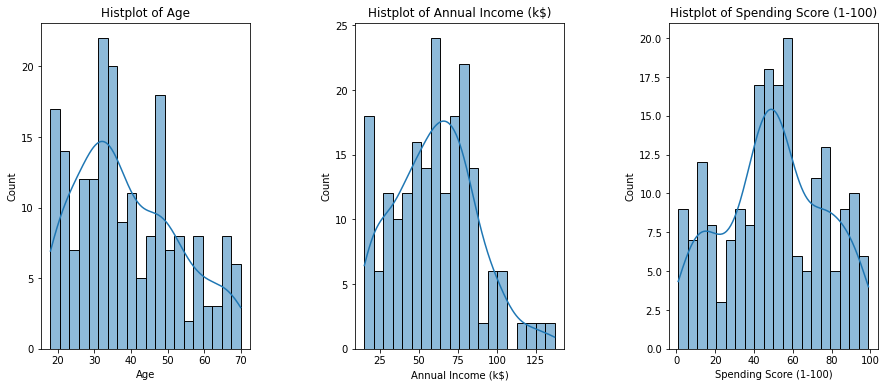

In [5]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for col in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(data=df, x=col, bins = 20, kde=True)
    plt.title('Histplot of {}'.format(col))
plt.show()

[]

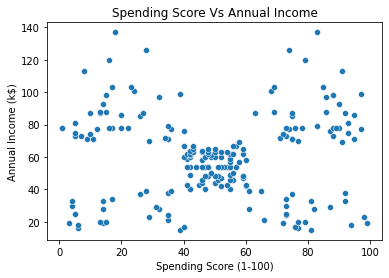

In [6]:
plt.title("Spending Score Vs Annual Income")
sns.scatterplot(data=df, x="Spending Score (1-100)", y="Annual Income (k$)")
plt.plot()

**Observations**
* From the visualization above we can infer that Data can be categorized into 5 clusters based on income and spending score.

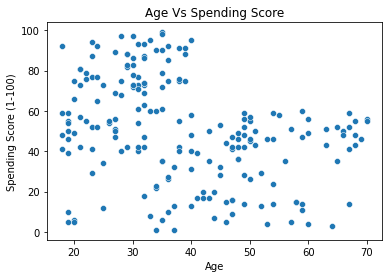

In [7]:
plt.title("Age Vs Spending Score")
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)")
plt.show()

**Observations**
* From the above plot we can infer that people between 20 - 40 are the ones who are spending more more likely because the are in the prime years and have high income to spend.
* Whereas after age 40, people are likely to earn less or use their retirement or savings money which may be the reason to spend low.

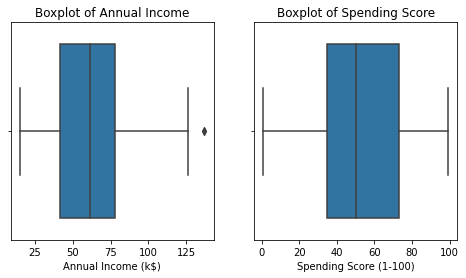

In [8]:
# Checking for any outliers as we will be using the K-Means Algorithm
# Box Plot for finding outliers
plt.figure(figsize=(8,4))
plt.subplots_adjust(hspace=.25)

plt.subplot(1,2,1)
plt.title("Boxplot of Annual Income")
sns.boxplot(x = df['Annual Income (k$)'])

plt.subplot(1,2,2)
plt.title("Boxplot of Spending Score")
sns.boxplot(x= df['Spending Score (1-100)'])

plt.show()

**Observations**
* From the above plot we can see that there is a outlier present in the Annual Income which may affect our K means model, so we  need to handle the outliers properly.

# Data Pre-Processing

In [9]:
# Drop ID as it does not have any effect in analysis as well as the model
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
# Printing some meaningful stats of the data
print("-----------Variance-----------")
print(df.var())

print("-----------Co-Variance-----------")
print(df.cov())

-----------Variance-----------
Age                       195.133166
Annual Income (k$)        689.835578
Spending Score (1-100)    666.854271
dtype: float64
-----------Co-Variance-----------
                               Age  Annual Income (k$)  Spending Score (1-100)
Age                     195.133166           -4.548744             -118.040201
Annual Income (k$)       -4.548744          689.835578                6.716583
Spending Score (1-100) -118.040201            6.716583              666.854271


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# Remove the Outlier using upper and lower boundary technique
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lr,ur = remove_outlier(df['Annual Income (k$)'])
df['Annual Income (k$)']=np.where(df['Annual Income (k$)'] > ur, ur , df['Annual Income (k$)'])
df['Annual Income (k$)']=np.where(df['Annual Income (k$)'] < lr, lr ,df['Annual Income (k$)'])

<AxesSubplot:title={'center':'Boxplot of Annual Income'}, xlabel='Annual Income (k$)'>

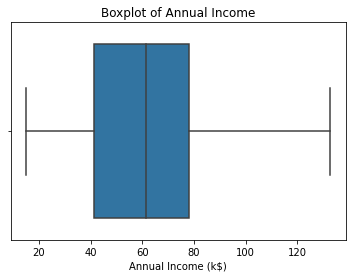

In [12]:
plt.title("Boxplot of Annual Income")
sns.boxplot(x = df['Annual Income (k$)'])

**Now the outlier is removed and the column is ready to be used in the model**

In [13]:
# Perform One Hot Encoding for the Gender Column
df = pd.get_dummies(df, columns=['Gender'])
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15.0,39,0,1
1,21,15.0,81,0,1
2,20,16.0,6,1,0
3,23,16.0,77,1,0
4,31,17.0,40,1,0


**Since any one of Gender Columns is enough for categoring the Gender, we are removing one of the male or female column to avoid duplication**

In [14]:
# Drop Female or either male to avoid duplication
df.drop('Gender_Female', axis = 1, inplace = True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15.0,39,1
1,21,15.0,81,1
2,20,16.0,6,0
3,23,16.0,77,0
4,31,17.0,40,0


# Training the Model
**To make sure we are getting the right clusters I am going to use two different clustering techniques for the above data and check both the results. The models that I am going to use are listed below:-**
* K-Means
* Mean-Shift

In [15]:
# Importing all the necessary modules for predicting, finding right params and validation
from sklearn.cluster import KMeans, MeanShift
from sklearn.metrics import silhouette_score

**Calculating the best possible K(Clusters Value) for K-Means**

In [16]:
# Calculating the best possible cluster
wss = []
for cluster in range(1, 11):
    KM = KMeans(n_clusters = cluster)
    KM.fit(df)
    wss.append(KM.inertia_)

In [17]:
for index, rate in enumerate(wss):
    if index == 0:
        print("Cluster " + str(index) + " Diff in wss value: Not Applicable")
    else:
        print("Cluster " + str(index) + " Diff in wss value: " + str(wss[index - 1] - wss[index]))

Cluster 0 Diff in wss value: Not Applicable
Cluster 1 Diff in wss value: 95969.04151214831
Cluster 2 Diff in wss value: 69056.44642439103
Cluster 3 Diff in wss value: 38976.9170181551
Cluster 4 Diff in wss value: 29008.711335350556
Cluster 5 Diff in wss value: 17046.92052887439
Cluster 6 Diff in wss value: 6998.65436785436
Cluster 7 Diff in wss value: 6594.159599264545
Cluster 8 Diff in wss value: 3198.1764811091707
Cluster 9 Diff in wss value: 3897.835358097662


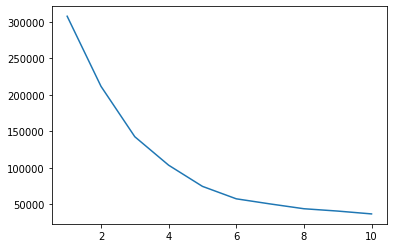

In [18]:
# Plot of wss
plt.plot(range(1,11), wss)

**From the above plot and calculation we can observe that K=5 will be right value.**

In [19]:
# Training the K-Means
k_means = KMeans(n_clusters = 5)
k_means.fit(df)
k_means_labels = k_means.labels_

**To find the right bandwidth for MeanShift, I did some trial and error and found 25 as a suitable one:-**

In [20]:
# Training the Mean Shift
ms = MeanShift(bandwidth = 25)
ms.fit(df)
ms_labels = ms.labels_
np.unique(ms.labels_)

array([0, 1, 2, 3, 4])

**Using bandwidth as 25 results in getting 5 clusters**

# Analysis

In [21]:
# Calculating the Silhouette_score for K - Means
print("Silhouette_score For K Means {}".format(silhouette_score(df, k_means_labels)))
print("Silhouette_score For Mean Shift {}".format(silhouette_score(df, ms_labels)))

Silhouette_score For K Means 0.4449124013060959
Silhouette_score For Mean Shift 0.4439077930884892


**Our silhouette_score just falls short of 0.5 mark, but we can say that most of the clusters are well categorized. The Score difference between K- Means and Mean Shift is not huge meaning both are classified similarly.**

In [22]:
# Adding both the Mean Shift and kmeans labels to our dataset for analysis
df['k_means_labels'] = k_means_labels
df['ms_labels'] = ms_labels
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,k_means_labels,ms_labels
0,19,15.0,39,1,1,4
1,21,15.0,81,1,4,3
2,20,16.0,6,0,1,4
3,23,16.0,77,0,4,3
4,31,17.0,40,0,1,4


**Plotting both the labels against Salary and Spending Score to verify the clusters**

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

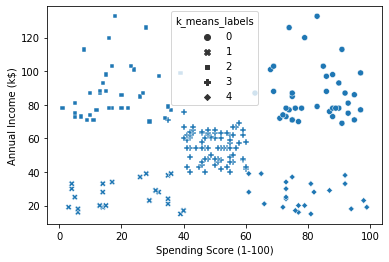

In [23]:
sns.scatterplot(data=df, x="Spending Score (1-100)", y="Annual Income (k$)", style="k_means_labels")

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

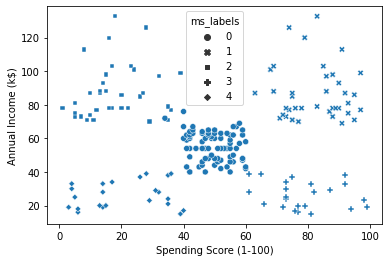

In [24]:
sns.scatterplot(data=df, x="Spending Score (1-100)", y="Annual Income (k$)", style="ms_labels")

#### Analysed points:-
1. The outcome between K-Means and Mean Shift are similar nearly despite both using different procedure to form clusters.
2. From the above clusters, we can separate the Data into Five Categories: (Category numbers are based from K-Means Graph)-
        1. Category 0 -  High Income High Spending Category
        2. Category 1 -  Medium Income Medium Spending
        3. Category 2 -  High Income Low Spending Category
        4. Category 3 -  Low Income High Spending Category
        5. Category 4 -  Low Income Low Spending Category

# Thanks!!! For Checking Out